In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First, Exploration of the Stock Data

In [2]:
dow_df = pd.read_csv("../data/DJIA_table.csv")

In [3]:
dow_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
dow_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
# Make the date column a valid time series
dow_df['Date'] = pd.to_datetime(dow_df['Date'])

In [6]:
# Sort the dates to be in ascending order
dow_df = dow_df.sort_values('Date', ascending=True)
dow_df.reset_index(inplace=True)

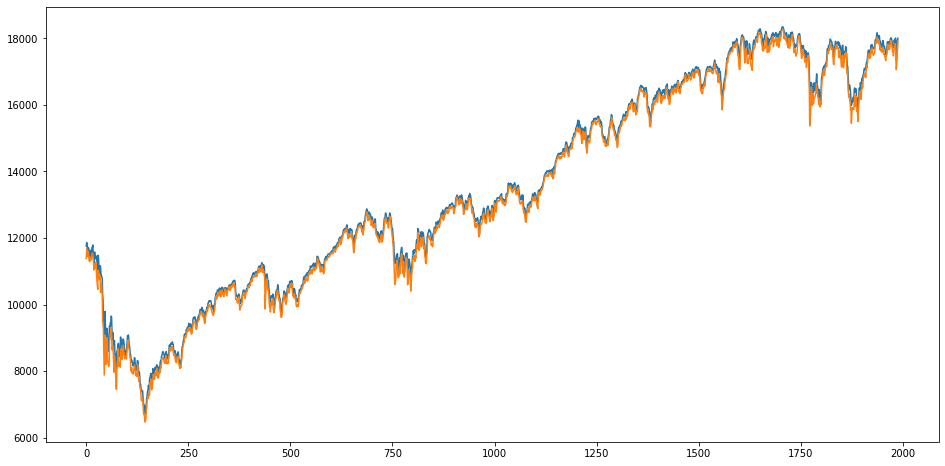

In [7]:
plt.figure(figsize=(16,8))
plt.plot(dow_df['High'])
plt.plot(dow_df['Low'])

## Baseline Models for Close Prices

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Split into train and validation signals
validation_proportion = 0.2 # The proportion of the data to leave out for validation
close_prices = np.array(dow_df['Close'])
# The index at which to cutoff the signal for validation
train_index_cutoff = int((1 - validation_proportion) * close_prices.shape[0])

close_prices_train = close_prices[:train_index_cutoff]
close_prices_valid = close_prices[train_index_cutoff:]
print(f"There are {close_prices_train.shape[0]} data points for training and {close_prices_valid.shape[0]} data points for validation")

There are 1591 data points for training and 398 data points for validation


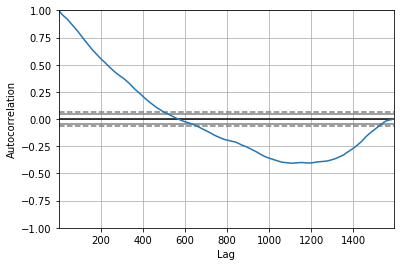

In [10]:
# Plot autocorrelation to determine autoregressive parameter in ARIMA
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(close_prices_train)

#### [Augmented Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test)

In [11]:
# Determine differencing order
# Perform an augmented dickey fuller test on different differencing orders
from statsmodels.tsa.stattools import adfuller

close_series_copy = close_prices_train.copy()

for i in range(5):
    # Print the ADF test statistic for this order of differencing
    adf_result = adfuller(close_series_copy)
    print(f"ADF p value for {i} order differencing: {adf_result[1]}")
    close_series_copy = np.diff(close_series_copy)

ADF p value for 0 order differencing: 0.9845669104126585
ADF p value for 1 order differencing: 5.984429922359614e-17
ADF p value for 2 order differencing: 1.1539296602229207e-25
ADF p value for 3 order differencing: 1.7268650143108602e-29
ADF p value for 4 order differencing: 0.0


In [12]:
arima_model = ARIMA(close_prices_train, order=(20, 1, 5))

In [13]:
fit_model = arima_model.fit()

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1590
Model:                ARIMA(20, 1, 5)   Log Likelihood              -10044.108
Method:                       css-mle   S.D. of innovations            133.913
Date:                Fri, 30 Aug 2019   AIC                          20142.216
Time:                        18:08:48   BIC                          20287.246
Sample:                             1   HQIC                         20196.088
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2331      2.749      1.904      0.057      -0.155      10.621
ar.L1.D.y     -0.8889      0.322     -2.760      0.006      -1.520      -0.258
ar.L2.D.y     -1.3135      0.073    -17.877      0.000      -1.457      -1.169
ar.L3.D.y     -0.0405      0.398     -0.102      0.919      -0.821       0.740
ar.L4.D.y     -0.0122      0.167     -0.073      0.942      -0.340       0.315
ar.L5.D.y      0.2239      0.356      0.629      0.529      -0.474       0.921
ar.L6.D.y     -0.0263      0.046     -0.571      0.568      -0.116       0.064
ar.L7.D.y     -0.0661      0.053     -1.237      0.216      -0.171       0.039
ar.L8.D.y      0.0396      0.091      0.436      0.663      -0.139       0.218
ar.L9.D.y     -0.0042      0.091     -0.046      0.963      -0.183       0.174
ar.L10.D.y     0.0971      0.048      2.030      0.043       0.003       0.191
ar.L11.D.y    -0.0024      0.054     -0.044      0.965      -0.109       0.104
ar.L12.D.y     0.0625      0.065      0.958      0.338      -0.065       0.190
ar.L13.D.y    -0.0280      0.055     -0.509      0.611      -0.136       0.080
ar.L14.D.y    -0.0419      0.049     -0.858      0.391      -0.138       0.054
ar.L15.D.y    -0.1124      0.078     -1.437      0.151      -0.266       0.041
ar.L16.D.y    -0.0468      0.052     -0.907      0.364      -0.148       0.054
ar.L17.D.y     0.0045      0.074      0.061      0.952      -0.140       0.149
ar.L18.D.y    -0.0322      0.058     -0.556      0.578      -0.146       0.081
ar.L19.D.y    -0.0373      0.044     -0.850      0.396      -0.123       0.049
ar.L20.D.y    -0.0893      0.051     -1.758      0.079      -0.189       0.010
ma.L1.D.y      0.7956      0.324      2.459      0.014       0.161       1.430
ma.L2.D.y      1.2049      0.100     12.041      0.000       1.009       1.401
ma.L3.D.y     -0.0651      0.391     -0.167      0.868      -0.832       0.701
ma.L4.D.y     -0.0121      0.163     -0.074      0.941      -0.332       0.308
ma.L5.D.y     -0.2408      0.318     -0.758      0.448      -0.863       0.382
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1683           -0.1575j            1.1788           -0.4787
AR.2            -1.1683           +0.1575j            1.1788            0.4787
AR.3            -0.9712           -0.6046j            1.1440           -0.4114
AR.4            -0.9712           +0.6046j            1.1440            0.4114
AR.5            -0.6976           -0.8450j            1.0958           -0.3598
AR.6            -0.6976           +0.8450j            1.0958            0.3598
AR.7            -0.3744           -0.9282j            1.0009           -0.3110
AR.8            -0.3744           +0.9282j            1.0009            0.3110
AR

In [15]:
model_training_prediction = fit_model.predict(1, close_prices_train.shape[0])
model_forecast = fit_model.forecast(close_prices_valid.shape[0])[0]

In [16]:
train_length = close_prices_train.shape[0]
valid_length = close_prices_valid.shape[0]

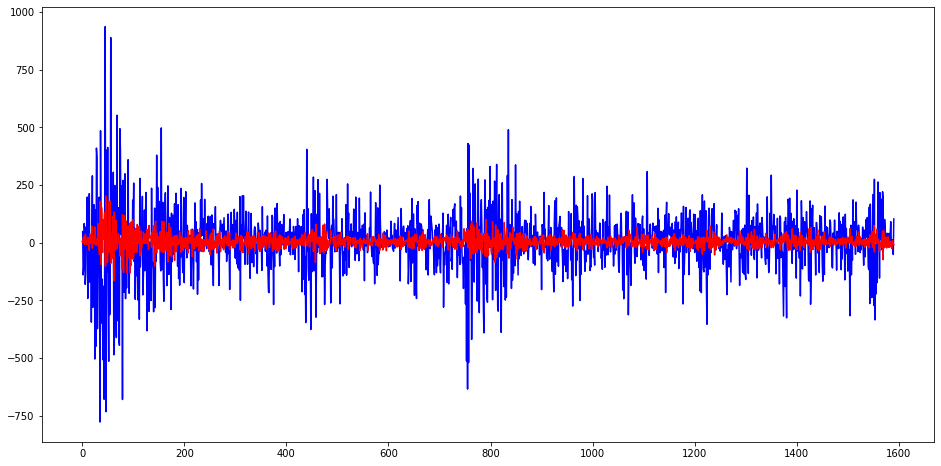

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, train_length), np.diff(close_prices_train), color='blue')
plt.plot(range(train_length), model_training_prediction, color='red')

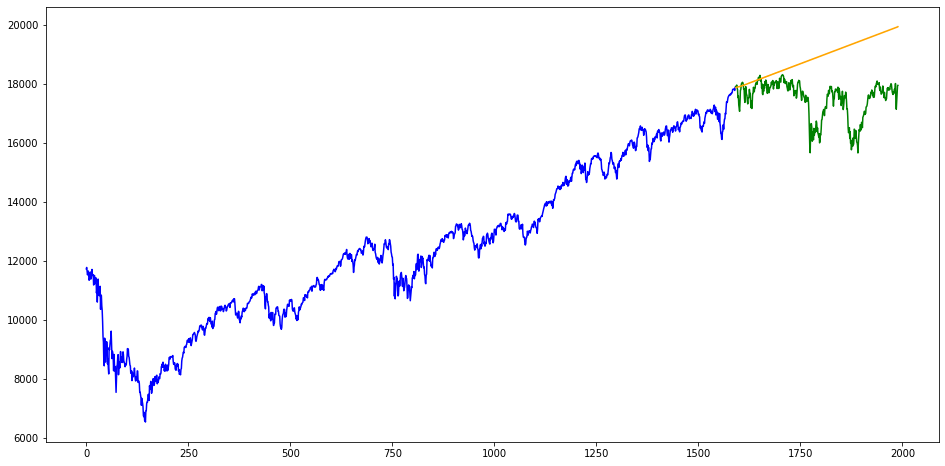

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(range(train_length), close_prices_train, color='blue')
plt.plot(range(train_length + 1, train_length + valid_length + 1), close_prices_valid, color='green')
plt.plot(range(train_length + 1, train_length + valid_length + 1), model_forecast, color='orange')

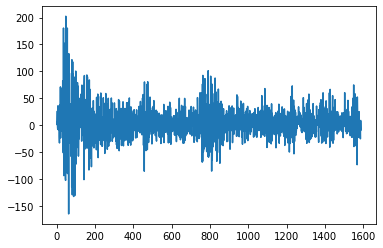

In [19]:
plt.plot(model_training_prediction)

In [20]:
from sklearn.metrics import mean_absolute_error
print(f"Training MAE: {mean_absolute_error(np.diff(close_prices_train), model_training_prediction[1:])}")
print(f"Validation MAE: {mean_absolute_error(model_forecast, close_prices_valid)}")

Training MAE: 104.61453331563253
Validation MAE: 1416.4831697889022
